# outline

- autoencoder: generalization of dict learning using deep neural networks

    high dimensional data - autoencoder -> low dimensional data -> downstream analysis (image classification,  image reconstruction)


- variational autoencoders

# recall: minimal neural network

**multi-layer perceptrons** (MLP)

sparse dict learning: a simple 2-layer network: input layer and coding layer

# autoencoders

- unsupervised learning methods


- squeeze high dimensional data through a "bottleneck" of lower dimension


- train to minimize **reconstruction error**

    similar to one interpretation of PCA

## autoencoder vs. PCA

PCA: all linear function, no non-linearity

input: $x \in \mathbb{R}^d$: high dimension data 

encoder: $A \in \mathbb{R}^{k \times d}$: orthogonal projection matrix

code: $Ax  \in \mathbb{R}^{k}$ low-dimension data

decoder: $A^T \in \mathbb{R}^{d \times k}$, transpose of the projection matrix $A$

output: $\hat x = A^T(Ax) \in \mathbb{R}^d$ lossy data in the same high dimension

## key aspects

- unsupervised: no labels, goal is to discover useful features of input


- compression 压缩: code reduces dimension of data


- lossy 有损: input won't be reconstructed exactly


- trained: the compression algorithm is learned for specific data

    for PCA, just use SVD to solve, but can also train as an optimization problem
    
    
- can use different loss for specific problems

## deep architecture

feed forward: 

- similar to supervised neural network

- difference: learning the **input itself**

7 layers: 1 input layer + 2 hidden layers + 1 code layer + 2 hidden layers + 1 output layer

encoder: 2 hidden layers = 1 linear function + 1 non-linear function + 1 linear function + 1 non-linear function

decoder: 2 hidden layers = 1 linear function + 1 non-linear function + 1 linear function + 1 non-linear function

non-linear function apply elementwise:

- **Rectified Linear Unit (RelU)** is non-negative part of a number 

$$
\text{ReLU}(\mathbf{x})=x_{+} = \max(0,x)
$$


- Sigmoid function

$$
y = \sigma (\mathbf{x}) = \frac{1}{1+e^{-x}}
$$

- hyperbolic tanget

$$
y=\tanh x
$$

## e.g. simple 2 hidden layers

for regression

Goal: optimize over $W, \tilde W, b, \tilde b$ to minimize **reconstruction error** with $l_1$ norm penalty: 

$$
\begin{align}
\hat W, \hat {\tilde W}, \hat b, \hat {\tilde b} 

&= \underset{W, \tilde W, b, \tilde b} {\arg \min} \frac{1}{n}\sum _{i=1}^n \left (\left \| x_i - \hat x_i  \right \|_2^2 + \lambda \left \| h_i \right \|_1   \right ) \\[1em]

&= \underset{W, \tilde W, b, \tilde b} {\arg \min} \frac{1}{n}\sum _{i=1}^n \left (\left \| x_i - \text{ReLU}\left ( \tilde W \text{ReLU}(Wx_i +b) + \tilde b \right )  \right \|_2^2 + \lambda \left \| h_i \right \|_1   \right ) \\[1em]
\end{align}
$$

encoder network:

$$
h= \text{ReLU}(Wx+b)
$$

decoder network:

$$
\hat x= \text{ReLU}(\tilde Wh+\tilde b)
$$

where $D>H$

$x,\hat x, \tilde b  \in \mathbb{R}^D$, $b, h \in \mathbb{R}^{H}$

$W \in \mathbb{R}^{H \times D}$, $\tilde W \in \mathbb{R}^{D \times H}$


## e.g. simple 2 hidden layers + 1 code layer

for classification

Goal: minimize **binary cross-entropy loss** by optimizing over $W_1, W_2, \tilde W_1, \tilde W_2, b_1, b_2, \tilde b_1, \tilde b_2$

Loss function: 

$$
\hat W_1, \hat W_2, \hat {\tilde W_1}, \hat {\tilde W_2},\hat  b_1, \hat b_2, \hat{\tilde b_1}, \hat{\tilde b_2} = \arg \min \frac{1}{n}\sum_{i=1}^n \left [ x_i \log(\hat x_i) +(1- x_i) \log(1- \hat x_i) \right ]
$$

encoder network:

$$
h= \text{ReLU}(W_1 \mathbf{x} + b_1) \\[1em]

c= \text{ReLU}(W_2 h + b_2)
$$

decoder network:

$$
\hat h = \text{ReLU}(\tilde W_1 c + \tilde b_1) \\[1em]

\hat x= Sigmoid(\tilde W_2 \hat h+\tilde b_2)
$$

where $D>H>K$

$x,\hat x, \tilde b_2  \in \mathbb{R}^D, b_1, h, \tilde b_1, \hat h \in \mathbb{R}^{H}, b_2, c \in \mathbb{R}^{K}$

$W_1 \in \mathbb{R}^{H \times D}, W_2 \in \mathbb{R}^{K \times H}, \tilde W_1 \in \mathbb{R}^{K \times H}, \tilde W_2 \in \mathbb{R}^{D \times H}$

# Variational Autoencoder

## denoising autoencoder

- input **noisy** data, output **denoised** data

- process: original image -add noise-> noisy input - encoder -> code - decoder -> output (denoised image)

- train to minimize reconstruction error between original input (noisy-free) and output

## sparse autoencoder

Loss function with $l_1$ norm:

$$
L = Loss + \lambda \left \| h_i \right \|_1
$$

- add a penalty to make code layer sparse

    e.g. 1-sparse code
    
$$
code = \begin{bmatrix}
0\\ 
\vdots \\ 
1\\ 
\vdots \\ 
0
\end{bmatrix}
$$

- want to find interesting structure


- generalizes sparse dictionary learning

## generative model

- **training goal**: find posterior distribution $p(\mathbf{z}|\mathbf{x})$

- problem: hard to compute coz $G()$ is non-linear

- **solution**: **variational inference**
    
    a powerful method for solving all Bayesian inference

- decoder is a generative model with a latent variable $\mathbf{z} \in \mathbb{R}^K$

    $\mathbf{x} \in \mathbb{R}^D$ is observed data

$$
\mathbf{x}|\mathbf{z} \sim P(\cdot | z)
$$

- encoder approximates posterior distribution $P(\mathbf{z} | \mathbf{x})$ for the latent variable $\mathbf{z}$ to find the latent variable

suppose a latent variable $\mathbf{z} \in \mathbb{R}^K$ is normal

$$
\mathbf{z} \sim N(\mathbf{0}, I_K)
$$

where $I_K \in \mathbb{R}^{K \times K}$ is an identity matrix

then the output data $\mathbf{x}$ conditional on $\mathbf{z}$ is also normal

$$
\mathbf{x}|\mathbf{z}  \sim N(G(\mathbf{z}), \gamma^2 I_D)
$$

where $G(\mathbf{z})$ is **generator network** or **decoder**

a simple example of $G(\mathbf{z})$ has one hidden layer

$$
G(\mathbf{z}) = A_2 \text{ReLU} (A_1 \mathbf{z} + b_1) + b_2
$$

## transformed Gaussian

crazy things can happen when apply activation functions to Gaussians

let $Z \sim N(\mathbf{0}, I)$

a hidden layer: apply an affine mapping to $Z$ 仿射 （缩放变换 $A$ + 平移变换 $b$)

$$
h=AZ+b
$$

so $h \sim N(b, AA^T)$

then apply an activation function - a monotonic transformation 单调变换 to $h$:

$$
X = g(h)
$$


list of activation functions

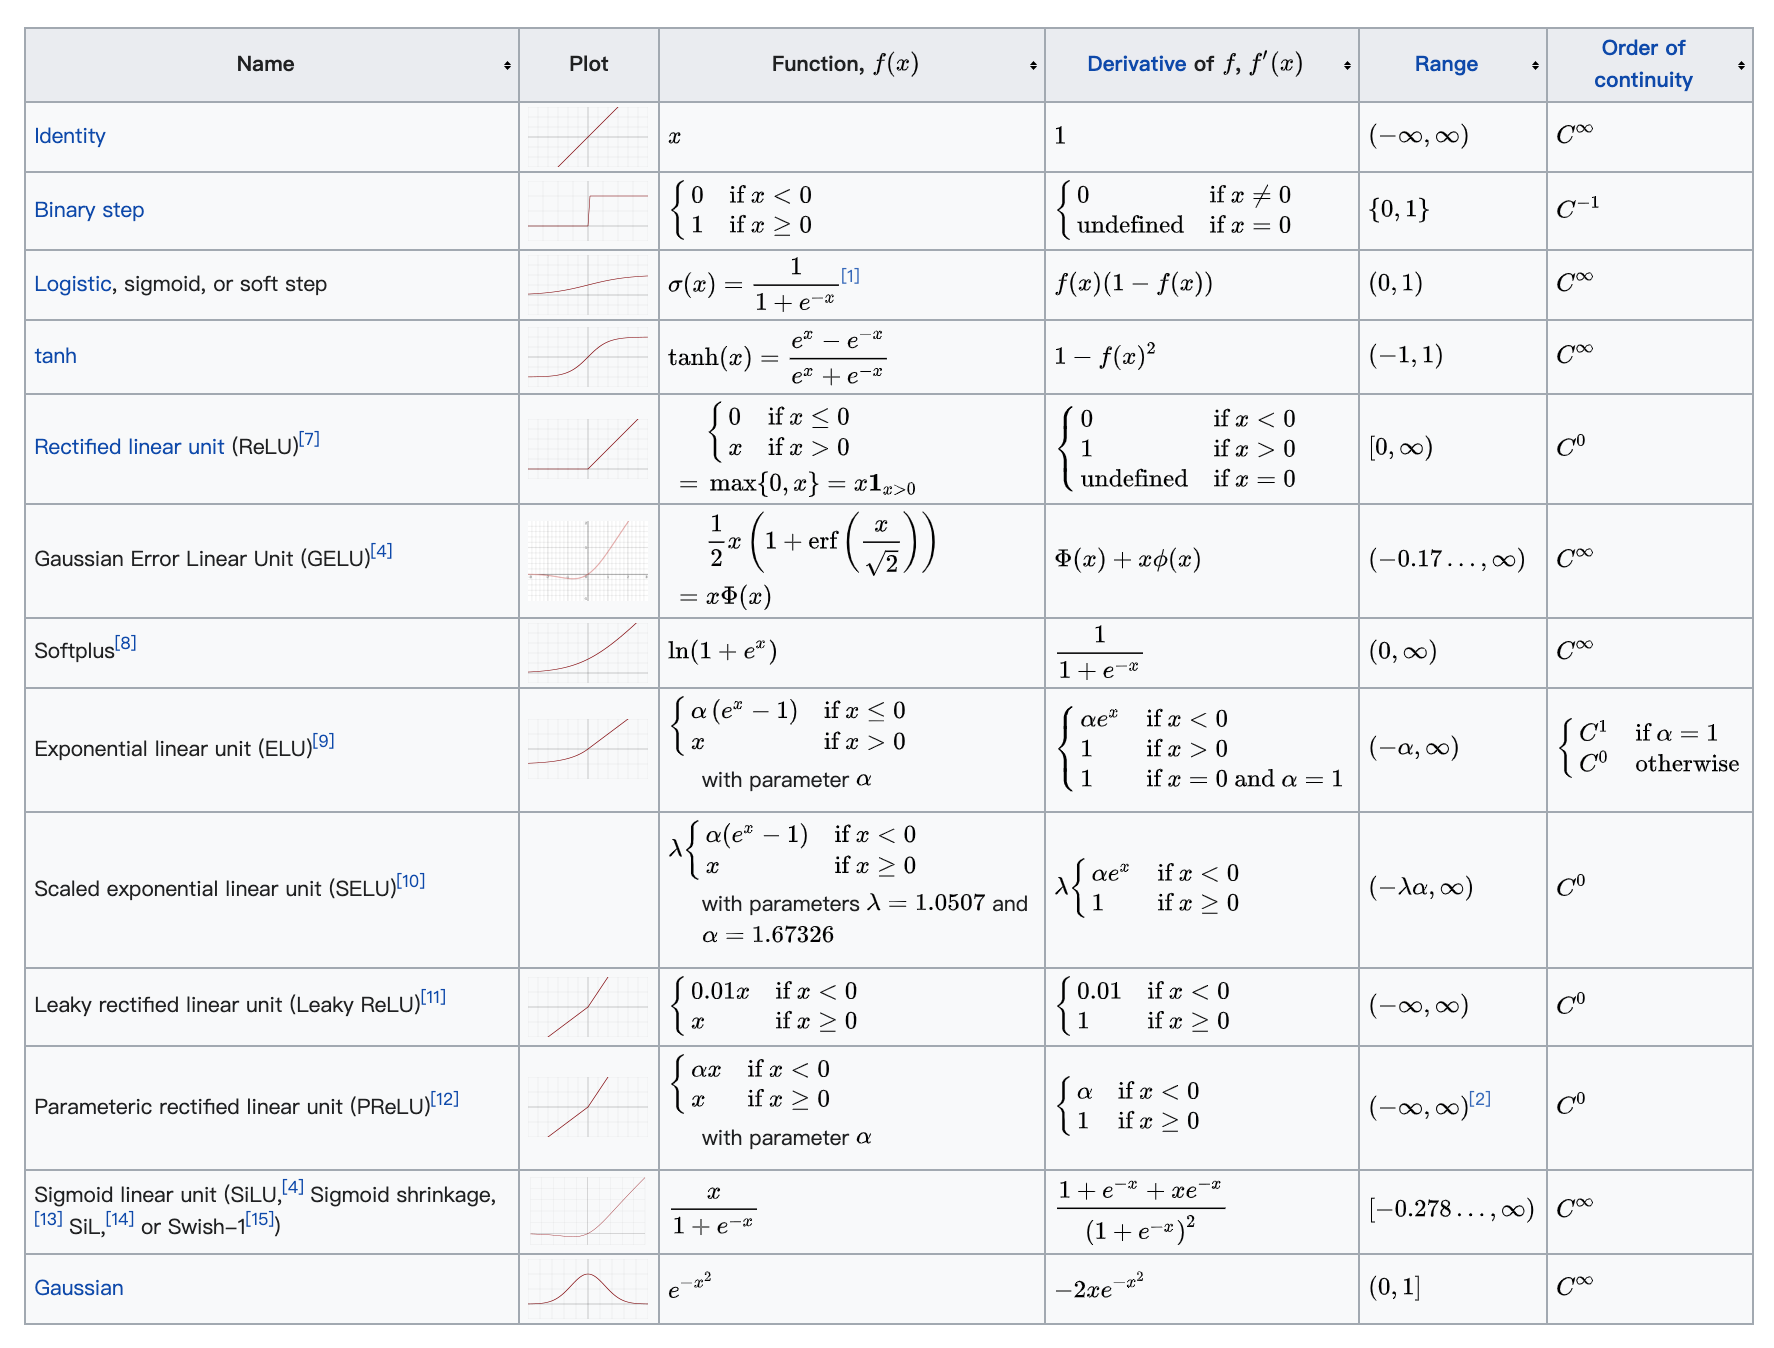

## mean field variational inference

one method of variational inference is mean field,

a popular method for topic modeling

**Goal**: optimize over $\mu$ and $\sigma^2$ to minimize discrepency between $p(\mathbf{z}|\mathbf{x})$ and $q(\mathbf{z}|\mathbf{x})$


we use $q(\mathbf{z}|\mathbf{x})$ to approximate the complicated true posterior distribution $p(\mathbf{z}|\mathbf{x})$

$$
q(\mathbf{z}|\mathbf{x}) = N\left ( \mu(\mathbf{x}), \text{diag}(\sigma^2 (\mathbf{x})) \right )
$$

where $\mu_j(\mathbf{x})$ and $\sigma_j^2 (\mathbf{x})$ are independent variational parameters for $j=1,...,K$



### build neural network

build a **encoder**/**recogonition network** that input $x$, output mean $\mu$ and variance $\sigma^2$

e.g.

$$
\mu(\mathbf{x}) = B_2 \text{ReLU} (B_1 \mathbf{x} + d_1) + d_2
$$

similar for $\sigma^2 = e^{\log \sigma^2(\mathbf{x})}$

$$
\log \sigma^2(\mathbf{x}) = \tilde B_2 \text{ReLU} (\tilde B_1 \mathbf{x} + \tilde d_1) + \tilde d_2
$$

### use neural network

see David Blei tutorial

**Goal**: optimize over $\mu$ and $\sigma^2$ to minimize KL divergence between 2 distributions $p(\mathbf{z}|\mathbf{x})$ and $q(\mathbf{z}|\mathbf{x})$

Loss function:

$$
\hat q = \arg \min_q KL(q||p)=\arg \min_q - \mathbb{E}_q\left ( \log p\left ( \mathbf{x}|Z \right ) \right ) \approx - \frac{1}{N}\sum _{s=1}^N  \log p\left ( \mathbf{x}|Z_s \right )
$$ 

KL divergence is expectation over $q$ distribution $\mathbb{E}_q\left ( \log p\left ( \mathbf{x}|Z \right ) \right )$

KL divergence has order, $p$ distribution take expectation with respect to $q$ distribution

for an observed $x$, we approximate this expectation by sampling $Z_s$

$Z$ is the only random variable in the equation


**problem**: we want to optimize over $\mu$ and $\sigma^2$ , but the parameters in the recognition network don't occur in the loss function


**solution**: ""reparameterization trick""

re-express the samples $Z_s$ by 
    
$$
Z_i = \mu(\mathbf{x}) + \sigma(\mathbf{x}) \epsilon _i
$$
    
where $\epsilon _i \sim N(\mathbf{0}, I_k)$


### simple e.g.

suppose output data $\mathbf{x} \in \mathbb{R}^D$ conditional on $\mathbf{z}$ is also normal

$$
\mathbf{x}|\mathbf{z} \sim N(G(\mathbf{z}), \gamma^2 I_D)
$$

generator network is

$$
G(\mathbf{z}) = \text{ReLU} (A \mathbf{z} + b)
$$

then negative log posterior distribution is

NLL is just $l_2$ norm squared

$$
-\log p(\mathbf{x}|\mathbf{z}) =  - \frac{1}{2}\log \left ( \exp\left ( -\left \| \mathbf{x}-G(\mathbf{z}) \right \|_2^2 \right ) \right )=\frac{1}{2} \left \| \mathbf{x}-G(\mathbf{z}) \right \|_2^2 = \frac{1}{2}\left \|  \mathbf{x}- \text{ReLU}(Az+b)\right \|_2^2 
$$

suppose the approximate posterior is $Z \sim q_{\mu}$ 

$$
q(\mathbf{z}|\mathbf{x}) = N ( \mu(\mathbf{x}), I_K)
$$

in this e.g. we simplify by set $I_K= diag(\sigma^2 (\mathbf{x}))$ 

$$
q(\mathbf{z}|\mathbf{x}) = N\left ( \mu(\mathbf{x}), diag(\sigma^2 (\mathbf{x})) \right )
$$

recall **solution**: ""reparameterization trick""

re-express the samples $Z_s$ by 
    
$$
Z_i = \mu(\mathbf{x}) + \sigma(\mathbf{x}) \epsilon _i
$$
    
where noise $\epsilon _i \sim N(\mathbf{0}, I_k)$

**instead of randomly sample $Z$, we randomly sample $\epsilon$**

here re-express samples $Z_s$ by 

$$
\mathbf{z}=\mu(\mathbf{x}) + \epsilon
$$

where $\epsilon \sim N(\mathbf{0}, I_k)$

recognition network $\mu(\mathbf{x})$ is:

$$
\mu(\mathbf{x}) = \text{ReLU} (B \mathbf{x} + d) 
$$

thus 

$$
\mathbf{z}=\text{ReLU} (B \mathbf{x} + d)  + \epsilon
$$

then the KL divergence is

$$
\hat q = \arg \min_q KL(q||p)=\arg \min_q - \mathbb{E}_q\left ( \log p\left ( \mathbf{x}|Z \right ) \right ) \\[1em]


\approx \hat Z 

= \underset{Z}{\arg\min}  - \frac{1}{N}\sum _{s=1}^N  \log p\left ( \mathbf{x}|Z_s \right ) 

= \underset{Z}{\arg\min} \frac{1}{N}\sum _{s=1}^N  \frac{1}{2}\left \|  \mathbf{x}- \text{ReLU}(A Z_s+b)\right \|_2^2 
$$

for a fixed $x$ (observed), sample $N$ $Z_s$ acoording to distribution $q$, sometimes $N=1$

equal in distribution

$$
\approx \hat {\mu} ,\hat {\epsilon} = \underset{\mu, \epsilon}{\arg\min} \frac{1}{N}\sum _{s=1}^N  \frac{1}{2}\left \|  \mathbf{x}- \text{ReLU}[A (\mu(\mathbf{x}) + \epsilon_s)+b]\right \|_2^2 
$$

equal in distribution

$$
\approx \hat {\epsilon} = \underset{\epsilon}{\arg\min} \frac{1}{N}\sum _{s=1}^N  \frac{1}{2}\left \|  \mathbf{x}- \text{ReLU}[A (\text{ReLU} (B \mathbf{x} + d)  + \epsilon_s)+b]\right \|_2^2 
$$

nice thing: $\epsilon$ is independent of $\mu$

# Autoencoder vs. Variational Autoencoder

- autoencoder: optimize over weight and bias $A, B, d, b$

$$
\underset{A, B, d, b}{\arg\min} \left \|  \mathbf{x}- \text{ReLU}(A \text{ReLU} (B \mathbf{x} + d)  +b)\right \|_2^2 
$$


- variational autoencoder: optimize over noise $\epsilon$

$$
\hat {\epsilon} = \underset{\epsilon}{\arg\min} \frac{1}{N}\sum _{s=1}^N  \frac{1}{2}\left \|  \mathbf{x}- \text{ReLU}(A (\text{ReLU} (B \mathbf{x} + d)  + {\color{Red}\epsilon_s})+b)\right \|_2^2 
$$

variational autoencoder

- perspective 1: simple autoencoder
    
    add noise $\epsilon$ to code
    
    goal: minimize reconstruction error to be robust against noise


- perspective 2: Bayesian Statistics

    goal: code have latent variable interpretation
    
    for a given $x$, the approximate posterior distribution of $z$ is Gaussian
    
    $$
    q(\mathbf{z}|\mathbf{x})=N(\mu(\mathbf{x}), I_K)
    $$

    